In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv(r'C:\Users\91926\Downloads\Wholesale - Wholesale.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
continuous_data=data.drop(columns=['Channel','Region'])

In [6]:
scaler=StandardScaler()

In [7]:
ss_data=scaler.fit_transform(continuous_data)

In [9]:
from sklearn.cluster import KMeans

### Using Elbow method to find optimal value of clusters

In [11]:
clusters = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=101)
    kmeans.fit(ss_data)
    clusters.append(kmeans.inertia_)

C:\Users\91926\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91926\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91926\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91926\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

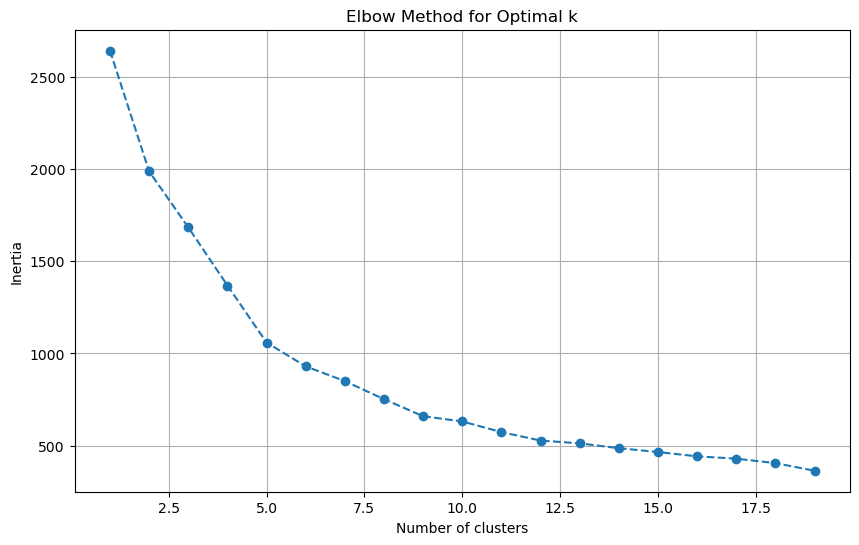

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), clusters, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

### optimal value of clusters=6

In [13]:
kmeans=KMeans(n_clusters=6,random_state=101)

In [14]:
kmeans.fit(ss_data)

C:\Users\91926\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=6, random_state=101)

In [15]:
predicted_data=kmeans.predict(ss_data)

In [16]:
print(predicted_data)

[0 0 0 0 2 0 0 0 0 3 3 0 2 3 2 0 3 0 2 0 0 0 2 3 2 0 0 0 3 2 2 0 0 2 0 0 2
 3 3 2 2 2 3 3 0 3 3 1 0 3 0 0 2 3 2 0 3 3 0 0 0 1 0 3 0 1 0 3 0 0 2 2 0 2
 0 2 0 3 0 0 0 3 0 2 0 1 1 2 0 2 0 0 3 5 3 0 0 0 0 0 3 3 0 5 0 0 3 3 0 3 0
 3 2 0 0 0 0 0 2 0 0 0 0 0 2 5 2 2 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 3 0 0
 0 2 0 0 0 0 0 3 3 0 0 3 0 0 0 3 0 3 0 0 0 0 3 3 0 3 0 3 2 0 0 0 0 5 3 4 0
 0 0 0 3 3 2 0 0 3 0 2 5 0 0 0 3 3 2 0 0 3 0 0 0 3 0 1 0 0 3 3 3 0 3 0 0 0
 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 2 2 2 0 0 0 3 0 0 0 0 0 3 0 2 0 2 0 0 2
 2 0 0 2 0 3 3 3 2 3 0 0 0 0 2 0 0 2 0 0 0 0 0 2 2 2 2 0 2 0 2 0 0 0 3 2 0
 0 0 0 0 0 3 0 3 3 3 3 0 0 3 0 2 3 0 0 3 0 0 0 3 0 0 0 0 2 5 0 0 2 0 0 3 2
 1 2 2 0 0 0 0 3 3 0 3 0 0 3 2 0 3 0 3 0 3 0 0 2 3 0 0 0 0 0 0 0 0 0 0 2 0
 2 2 0 0 0 0 3 2 0 0 2 2 2 0 3 0 0 2 0 0 0 0 0 2 0 0 3 0 0 0 0 2 2 2 0 0 2
 3 0 0 0 0 0 0 0 0 3 0 3 0 3 0 2 0 0 2 3 2 0 0 0 0 0 0 0 2 2 3 0 0]


In [17]:
data['KMeans_Cluster']=predicted_data

In [18]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,3
438,1,3,10290,1981,2232,1038,168,2125,0


In [20]:
kmeans.inertia_

929.7984274512871

## Hierarchical Clustering

In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [28]:
link=linkage(ss_data,method='ward')

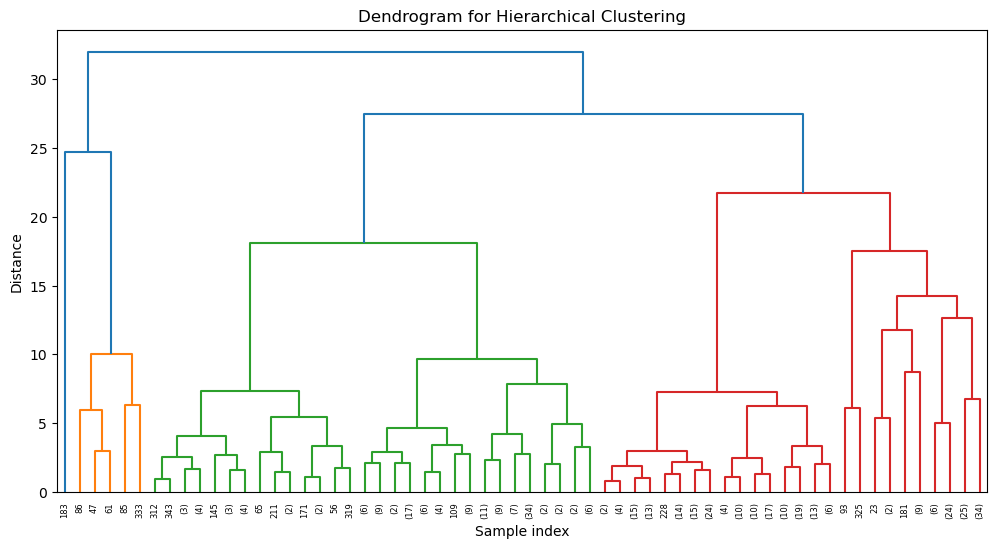

In [30]:
plt.figure(figsize=(12, 6))
dendrogram(link, truncate_mode='level', p=6)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')

In [39]:
cluster_labels=agg_clustering.fit_predict(ss_data)

In [40]:
cluster_labels

array([2, 2, 2, 4, 0, 2, 2, 2, 4, 2, 2, 4, 0, 0, 0, 4, 2, 2, 0, 2, 0, 4,
       0, 0, 2, 2, 4, 4, 5, 0, 0, 4, 0, 0, 4, 2, 0, 2, 2, 0, 0, 0, 2, 5,
       2, 5, 2, 1, 2, 5, 4, 4, 0, 2, 0, 4, 5, 2, 4, 2, 2, 1, 2, 2, 4, 5,
       2, 0, 4, 4, 0, 0, 4, 0, 2, 4, 4, 5, 4, 4, 4, 2, 2, 4, 2, 1, 1, 0,
       4, 0, 4, 0, 5, 0, 2, 4, 2, 4, 4, 4, 2, 2, 2, 0, 4, 4, 2, 2, 2, 2,
       4, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 0, 0, 0, 2, 0, 4, 4,
       4, 4, 4, 4, 2, 2, 0, 4, 0, 0, 0, 4, 2, 5, 4, 4, 4, 0, 4, 4, 4, 2,
       4, 5, 2, 4, 2, 2, 2, 4, 4, 5, 2, 2, 2, 4, 4, 4, 2, 5, 2, 5, 4, 2,
       0, 0, 2, 4, 0, 0, 2, 3, 4, 2, 4, 2, 2, 2, 0, 4, 4, 2, 4, 0, 0, 2,
       4, 4, 2, 5, 2, 4, 4, 5, 4, 2, 2, 2, 0, 5, 4, 2, 2, 2, 5, 4, 2, 4,
       4, 2, 4, 4, 4, 4, 0, 4, 4, 4, 0, 2, 0, 4, 0, 4, 4, 4, 4, 0, 0, 0,
       4, 0, 2, 2, 4, 4, 2, 4, 4, 5, 4, 0, 2, 0, 2, 4, 0, 0, 4, 4, 0, 4,
       2, 2, 2, 0, 2, 4, 4, 4, 2, 0, 4, 4, 0, 0, 4, 0, 4, 2, 0, 0, 0, 0,
       4, 0, 4, 0, 4, 4, 4, 2, 0, 4, 4, 2, 2, 4, 0,

In [44]:
data['Hierarchical_Cluster'] = cluster_labels

In [45]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster,Agglomerative_Cluster,Hierarchical_Cluster
0,2,3,12669,9656,7561,214,2674,1338,0,2,2
1,2,3,7057,9810,9568,1762,3293,1776,0,2,2
2,2,3,6353,8808,7684,2405,3516,7844,0,2,2
3,1,3,13265,1196,4221,6404,507,1788,0,4,4
4,2,3,22615,5410,7198,3915,1777,5185,2,0,0


## Compare Clusters

In [46]:
print("Clusters Comparison:")
comparison = pd.crosstab(data['KMeans_Cluster'], data['Hierarchical_Cluster'])
print(comparison)

Clusters Comparison:
Hierarchical_Cluster   0  1   2  3    4   5
KMeans_Cluster                             
0                     21  0  68  0  170   0
1                      0  5   0  0    0   2
2                     74  0   2  0    7   0
3                      3  0  57  0    0  24
4                      0  0   0  1    0   0
5                      6  0   0  0    0   0


## THANKS